# K近邻法

In [3]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import data.mldataset as data

In [18]:
class KNN:
    def __init__(self, X_train, Y_train, p=2, k=3):
        self.p = p
        self.k = k
        self.X_train = X_train
        self.Y_train = Y_train
    
    def Lp(self, x1, x2, p=2):
        '''
            Define Lp distance
            p = 1 is Manhattan distance
            p = 2 is Euclidean distance
        '''
        if len(x1) == len(x2) and len(x1) > 1:     # each input have same feature
            sum = 0
            for i in range(len(x1)):
                sum += math.pow(abs(x1[i]-x2[i]), p)
            return math.pow(sum, 1/p)
        else:
            return 0
    
    def predict(self, x):
        knn_list = []
        for i in range(self.k):
            # distance = self.Lp(X, self.X_train[i], p=self.p)
            distance = np.linalg.norm(x-self.X_train[i], ord=self.p)   # self.p范数 (2范数)
            knn_list.append((distance, self.Y_train[i]))   # add a tuple
        
        # first put 3 element, then keep replacing them with smaller ones
        for i in range(self.k, len(self.X_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            # distance = self.Lp(X, self.X_train[i], p=self.p)
            distance = np.linalg.norm(x-self.X_train[i], ord=self.p)
            if knn_list[max_index][0] > distance:
                knn_list[max_index] = (distance, self.Y_train[i])
        
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
        max_count = sorted(count_pairs, key=lambda x:x)[-1]
        return max_count
    
    def score(self, X_test, Y_test):
        right = 0
        for x, y in zip(X_test, Y_test):
            label = self.predict(x)
            if label == y:
                right += 1
        return right/len(X_test)

## Iris dataset

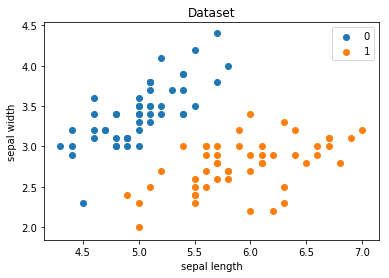

In [19]:
X, Y = data.iris()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [20]:
clf = KNN(X_train, Y_train)
clf.score(X_test, Y_test)

1.0

## digit dataset

In [21]:
X_train, X_test, Y_train, Y_test = data.digit()

In [22]:
clf = KNN(X_train, Y_train)
clf.score(X_test, Y_test)

0.9988655700510494